In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the insurance company dataset
insurance_df = pd.read_csv("/content/Top_10_Life_Insurance_Companies.csv")
insurance_df.columns = insurance_df.columns.str.strip()

# Load the patient dataset (already has 'HealthRisk' if you used earlier code)
patient_df = pd.read_csv("/content/Patient Data for Insurance.csv")

In [39]:
# Define a function to assess risk based on rules
def assess_risk(row):
    risk_score = 0
    if row["Age"] > 60:
        risk_score += 1
    if row["Smoking"] == 1:
        risk_score += 1
    if row["BMI"] > 30:
        risk_score += 1
    if row["FamilyHistoryKidneyDisease"] == 1:
        risk_score += 1
    if row["FamilyHistoryHypertension"] == 1:
        risk_score += 1
    if row["FamilyHistoryDiabetes"] == 1:
        risk_score += 1

    if risk_score >= 3:
        return "High"
    elif risk_score == 2:
        return "Medium"
    else:
        return "Low"

# Apply the risk assessment to the dataset
patient_df["HealthRisk"] = patient_df.apply(assess_risk, axis=1)

# Display the updated dataframe with the new HealthRisk column
patient_df[["Age", "BMI", "Smoking", "FamilyHistoryKidneyDisease",
            "FamilyHistoryHypertension", "FamilyHistoryDiabetes", "HealthRisk"]].head(10)


,Age,BMI,Smoking,FamilyHistoryKidneyDisease,FamilyHistoryHypertension,FamilyHistoryDiabetes,HealthRisk
0,71,31.069414,1,0,0,0,High
1,34,29.692119,1,1,1,0,High
2,80,37.394822,1,0,0,0,High
3,40,31.329680,0,0,0,0,Low
4,43,23.726311,0,0,0,0,Low
5,22,39.155643,0,0,0,0,Low
6,41,35.040487,0,0,1,0,Medium
7,72,30.760440,1,0,0,0,High
8,21,22.323130,0,0,0,0,Low
9,49,24.338507,0,0,0,0,Low


In [40]:
import plotly.express as px

# Group and prepare data
sunburst_data = patient_df.groupby(['Gender', 'HealthRisk']).size().reset_index(name='Count')
sunburst_data['Gender'] = sunburst_data['Gender'].map({0: 'Female', 1: 'Male'})

# Generate the sunburst chart
fig = px.sunburst(
    sunburst_data,
    path=['Gender', 'HealthRisk'],
    values='Count',
    color='HealthRisk',
    color_discrete_map={'Low': 'green', 'Medium': 'orange', 'High': 'red'},
    title="Sunburst Chart of Gender and Health Risk"
)

fig.show()


In [41]:
import pandas as pd
import plotly.express as px
# Load the patient dataset (already has 'HealthRisk' if you used earlier code)
patient_df = pd.read_csv("/content/Patient Data for Insurance.csv")


patient_df.columns = patient_df.columns.str.strip()

# Apply your custom function
patient_df["HealthRisk"] = patient_df.apply(assess_risk, axis=1)

# Define age bins
bins = [0, 25, 35, 45, 55, 65, 80, 100]
labels = ['0-25', '26-35', '36-45', '46-55', '56-65', '66-80', '81+']
patient_df["AgeGroup"] = pd.cut(patient_df["Age"], bins=bins, labels=labels, right=False)

# Build sunburst
fig = px.sunburst(
    patient_df,
    path=["HealthRisk", "AgeGroup"],
    values=None,  # Count by default
    color="HealthRisk",
    color_discrete_sequence=px.colors.qualitative.Set2,
    title="Sunburst of Health Risk Levels by Age Group"
)

fig.show()


/usr/local/lib/python3.11/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [42]:
print(patient_df.columns.tolist())

['Age', 'Gender', 'BMI', 'Smoking', 'FamilyHistoryKidneyDisease', 'FamilyHistoryHypertension', 'FamilyHistoryDiabetes', 'Diagnosis', 'CKD_Stage_4Level', 'HealthRisk', 'AgeGroup']


In [43]:
import pandas as pd

# Load the insurance company dataset
insurance_df = pd.read_csv("/content/Top_10_Life_Insurance_Companies.csv")
insurance_df.columns = insurance_df.columns.str.strip()

# Top 3 by Claim Settlement Ratio
top_claim = insurance_df.sort_values(by=["Claim Settlement Ratio"], ascending=False).head(3)  # Define top_claim

# Top 3 by Complaint Volume
top_complaint = insurance_df.sort_values(by=["Complaint Volume"], ascending=True).head(3)  # Define top_complaint

# Top 3 by Amount Settlement Ratio
top_amount = insurance_df.sort_values(by=["Amount Settlement Ratio"], ascending=False).head(3)  # Define top_amount

# Top 3 by Annual Business
top_business = insurance_df.sort_values(by=["Average Annual Business (in crores)"], ascending=False).head(3)  # Define top_business


print("Top 3 by Claim Settlement Ratio:")
print(top_claim[["Company", "Claim Settlement Ratio"]])
print()

print("Top 3 by Lowest Complaint Volume:")
print(top_complaint[["Company", "Complaint Volume"]])
print()

print("Top 3 by Amount Settlement Ratio:")
print(top_amount[["Company", "Amount Settlement Ratio"]])
print()

print("Top 3 by Average Annual Business (in crores):")
print(top_business[["Company", "Average Annual Business (in crores)"]])

Top 3 by Claim Settlement Ratio:
                                 Company  Claim Settlement Ratio
1            Max Life Insurance Co. Ltd.                   99.40
5  Bajaj Allianz Life Insurance Co. Ltd.                   98.85
0    Life Insurance Corporation of India                   98.71

Top 3 by Lowest Complaint Volume:
                            Company  Complaint Volume
3  Tata AIA Life Insurance Co. Ltd.               2.3
8      HDFC Life Insurance Co. Ltd.               2.7
6       SBI Life Insurance Co. Ltd.               3.8

Top 3 by Amount Settlement Ratio:
                                    Company  Amount Settlement Ratio
1               Max Life Insurance Co. Ltd.                     95.5
0       Life Insurance Corporation of India                     95.1
2  Aditya Birla Sun Life Insurance Co. Ltd.                     93.9

Top 3 by Average Annual Business (in crores):
                                 Company Average Annual Business (in crores)
5  Bajaj Allianz Life

In [51]:
# Normalize key metrics (0 to 1 scale)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_metrics = scaler.fit_transform(insurance_df[[
    "Claim Settlement Ratio", "Amount Settlement Ratio", "Complaint Volume"
]])

# Create new DataFrame for scores
insurance_df_scaled = insurance_df.copy()
insurance_df_scaled[["Claim_Settlement_Scaled", "Amount_Settlement_Scaled", "Complaint_Scaled"]] = scaled_metrics

# Invert Complaint Volume (since lower is better)
insurance_df_scaled["Complaint_Scaled"] = 1 - insurance_df_scaled["Complaint_Scaled"]

# Weighted score formula
insurance_df_scaled["Matching Score"] = (
    0.4 * insurance_df_scaled["Claim_Settlement_Scaled"] +
    0.3 * insurance_df_scaled["Amount_Settlement_Scaled"] +
    0.3 * insurance_df_scaled["Complaint_Scaled"]
)

# Top 5 overall companies by score
top_overall = insurance_df_scaled.sort_values(by="Matching Score", ascending=False).head(5)


<ipython-input-45-578592ddfa72>:27: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




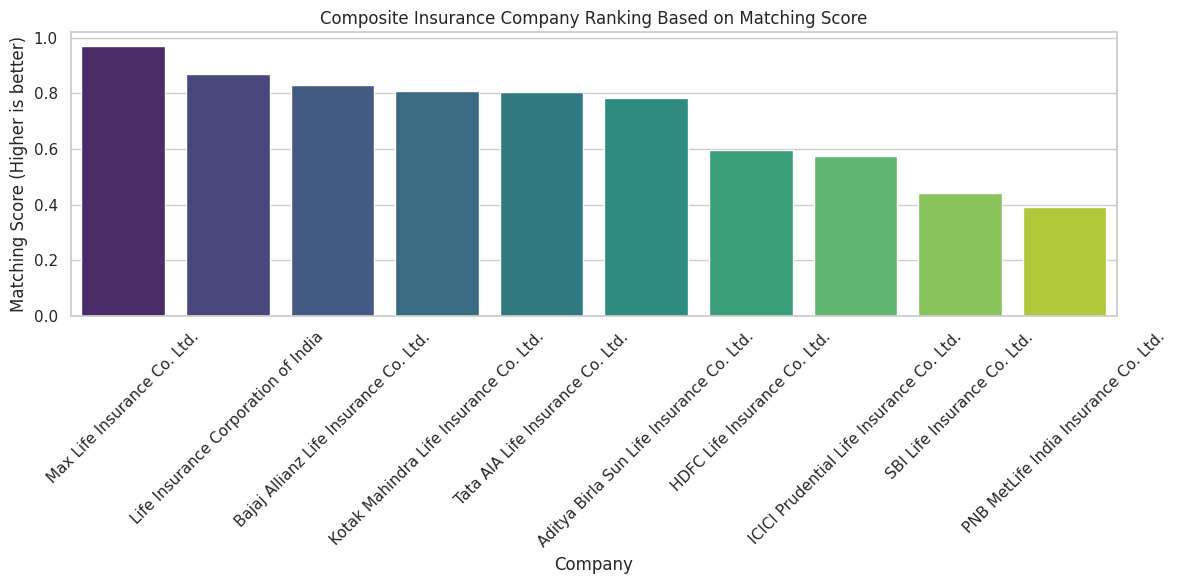

In [45]:
from sklearn.preprocessing import MinMaxScaler

# Prepare the data by scaling the relevant columns
scaler = MinMaxScaler()

# We will scale the columns: 'Claim Settlement Ratio', 'Complaint Volume', 'Amount Settlement Ratio'
scaled_columns = ['Claim Settlement Ratio', 'Complaint Volume', 'Amount Settlement Ratio']

# Apply the scaler to the relevant columns
insurance_df[scaled_columns] = scaler.fit_transform(insurance_df[scaled_columns])

# To ensure that lower complaint volume is better, we will invert the scaled complaint values
insurance_df['Complaint_Scaled'] = 1 - insurance_df['Complaint Volume']

# Calculate the Matching Score (equal weights for now)
insurance_df['Matching_Score'] = (
    insurance_df['Claim Settlement Ratio'] +
    insurance_df['Amount Settlement Ratio'] +
    insurance_df['Complaint_Scaled']
) / 3

# Sort by the Matching Score in descending order
insurance_df_sorted = insurance_df.sort_values(by="Matching_Score", ascending=False)

# Plot the composite ranking based on Matching Score
plt.figure(figsize=(12, 6))
sns.barplot(data=insurance_df_sorted, x="Company", y="Matching_Score", palette='viridis')
plt.title("Composite Insurance Company Ranking Based on Matching Score")
plt.ylabel("Matching Score (Higher is better)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [46]:
def recommend_insurance(risk_level, insurance_df_scaled):
    if risk_level == "High":
        return insurance_df_scaled.sort_values(
            by=["Claim Settlement Ratio", "Amount Settlement Ratio"], ascending=False
        ).head(3)
    elif risk_level == "Medium":
        return insurance_df_scaled.sort_values(
            by="Matching Score", ascending=False
        ).head(3)
    else:  # Low risk
        return insurance_df_scaled.sort_values(
            by="Complaint Volume", ascending=True
        ).head(3)

# Example usage
patient_example = patient_df.iloc[0]
recommend_insurance(patient_example["HealthRisk"], insurance_df_scaled)


,Company,Claim Settlement Ratio,Complaint Volume,Amount Settlement Ratio,Average Annual Business (in crores),Claim_Settlement_Scaled,Amount_Settlement_Scaled,Complaint_Scaled,Matching Score
1,Max Life Insurance Co. Ltd.,99.40,7.0,95.5,"Rs.7,897",1.000000,1.000000,0.914077,0.974223
5,Bajaj Allianz Life Insurance Co. Ltd.,98.85,5.0,93.0,"Rs.8,729",0.847222,0.695122,0.950640,0.832617
0,Life Insurance Corporation of India,98.71,10.5,95.1,"Rs.205,137",0.808333,0.951220,0.850091,0.863727


In [47]:
print("Risk level:", patient_example["HealthRisk"])


Risk level: High


In [48]:
print("High Risk:")
print(recommend_insurance("High", insurance_df_scaled)[["Company", "Matching Score"]])

print("\nMedium Risk:")
print(recommend_insurance("Medium", insurance_df_scaled)[["Company", "Matching Score"]])

print("\nLow Risk:")
print(recommend_insurance("Low", insurance_df_scaled)[["Company", "Matching Score"]])


High Risk:
                                 Company  Matching Score
1            Max Life Insurance Co. Ltd.        0.974223
5  Bajaj Allianz Life Insurance Co. Ltd.        0.832617
0    Life Insurance Corporation of India        0.863727

Medium Risk:
                                 Company  Matching Score
1            Max Life Insurance Co. Ltd.        0.974223
0    Life Insurance Corporation of India        0.863727
5  Bajaj Allianz Life Insurance Co. Ltd.        0.832617

Low Risk:
                            Company  Matching Score
3  Tata AIA Life Insurance Co. Ltd.        0.800894
8      HDFC Life Insurance Co. Ltd.        0.618917
6       SBI Life Insurance Co. Ltd.        0.397871


In [49]:
# Function to recommend top 3 insurers based on risk level
def recommend_top_insurers(risk_level, insurance_df_scaled):
    if risk_level == "High":
        ranked = insurance_df_scaled.sort_values(
            by=["Claim Settlement Ratio", "Amount Settlement Ratio"], ascending=False
        )
    elif risk_level == "Medium":
        ranked = insurance_df_scaled.sort_values(
            by="Matching Score", ascending=False
        )
    else:  # Low risk
        ranked = insurance_df_scaled.sort_values(
            by="Complaint Volume", ascending=True
        )

    return ranked["Company"].head(3).tolist()

# Apply to each patient
patient_df["Top_Insurance_Options"] = patient_df["HealthRisk"].apply(
    lambda risk: recommend_top_insurers(risk, insurance_df_scaled)
)


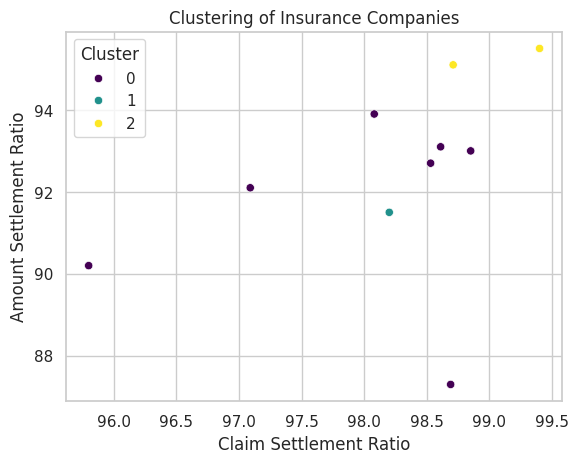

In [50]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns for clustering
X = insurance_df_scaled[[
    "Claim_Settlement_Scaled", "Amount_Settlement_Scaled", "Complaint_Scaled"
]]

# Fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
insurance_df_scaled["Cluster"] = kmeans.fit_predict(X)

# Visualize clusters
sns.scatterplot(
    x="Claim Settlement Ratio",
    y="Amount Settlement Ratio",
    hue="Cluster",
    data=insurance_df_scaled,
    palette="viridis"
)
plt.title("Clustering of Insurance Companies")
plt.show()
